# Synthetic Financial Datasets For Fraud Detection

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import numpy as np
import requests



### 1: Load The Credit Card Data


In [3]:
df = pd.read_csv('C:\Projects\SpringBoard\Capstone 1\Credit card\\Synthetic credit card.csv')

In [4]:
df.head(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


####  What does the columns mean
step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

### Data Wrangling and Exploratory Data Analysis

 #### 2: Number Of Missing Values By Column

In [6]:
missing = pd.concat([df.isna().sum(axis=1), 100 * df.isna().mean(axis=1)], axis=1)
missing.columns=["count", '%']
missing.sort_values(by="count", ascending=False)

,count,%
0,0,0.0
4241732,0,0.0
4241754,0,0.0
4241753,0,0.0
4241752,0,0.0
...,...,...
2120869,0,0.0
2120868,0,0.0
2120867,0,0.0
2120866,0,0.0


### 3: Categorical Features

In [7]:
df.select_dtypes('object')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


 ### 4: Unique Names

In [8]:
df['nameOrig'].value_counts().head()

C2098525306    3
C1065307291    3
C545315117     3
C363736674     3
C1999539787    3
Name: nameOrig, dtype: int64

In [9]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

 ####  4.1 Check the name duplicated with the destination.
  Concatenate the string columns 'nameOrig' and 'nameDest' and count the values again (as above)

In [15]:
#Concatenate the string columns 'nameOrig' and 'nameDest' and count the values again (as above)
(df['nameOrig'] + ', ' + df['nameDest']).value_counts().head()

C2099337034, C419399167     1
C304099062, M99242482       1
C896041099, M1530537977     1
C585022132, M1517889367     1
C1572416724, C2082350870    1
dtype: int64

In [16]:

df[df['nameOrig'] == 'C271870491']       

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5584506,394,PAYMENT,24397.6,C271870491,74615.0,50217.4,M1616091300,0.0,0.0,0,0


In [17]:
df[df['nameOrig'] == 'C400299098']

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
53297,9,PAYMENT,2142.13,C400299098,91105.15,88963.02,M885272395,0.00,0.00,0,0
1109407,130,PAYMENT,17257.53,C400299098,0.00,0.00,M1721640115,0.00,0.00,0,0
2181883,185,CASH_IN,120008.43,C400299098,15872727.23,15992735.66,C11496787,1482696.02,1362687.59,0,0


There are three data in one nameOrig, but they are clearly three different transactions.

 ### 5: The relationship between oldbalanceOrg and oldbalanceDest / newbalanceOrig and newbalanceDest

In [18]:
(df.oldbalanceDest != df.newbalanceDest).value_counts()

True     4045328
False    2317292
dtype: int64

In [19]:
(df.oldbalanceOrg!= df.newbalanceOrig).value_counts()

True     4273583
False    2089037
dtype: int64

In [20]:
#Filter the dataframe for rows where 'newbalanceOrig' and 'oldbalanceOrg' are different,
#group that by 'newbalanceOrig' and perform `value_counts` on the 'oldbalanceOrg'
(df[df.newbalanceOrig != df.oldbalanceOrg]
 .groupby('oldbalanceOrg')['newbalanceOrig']
.value_counts())

oldbalanceOrg  newbalanceOrig
0.00           85553.24          2
               99453.68          2
               133652.30         2
               5.44              1
               16.89             1
                                ..
47316255.05    37316255.05       1
49585040.37    39585040.37       1
50399045.08    40399045.08       1
57316255.05    47316255.05       1
59585040.37    49585040.37       1
Name: newbalanceOrig, Length: 3078784, dtype: int64

In [21]:
#Filter the dataframe for rows where 'newbalanceDest' and 'oldbalanceDest' are different,
#group that by 'newbalanceOrig' and perform `value_counts` on the 'oldbalanceOrg'
(df[df.newbalanceOrig != df.oldbalanceOrg]
 .groupby('newbalanceDest')['oldbalanceDest']
.value_counts())

newbalanceDest  oldbalanceDest
0.000000e+00    0.000000e+00      1542991
                1.980000e+02           11
                1.620000e+02           10
                1.930000e+02           10
                1.060000e+02            9
                                   ...   
3.279630e+08    3.278521e+08            1
3.279981e+08    3.281945e+08            1
3.281945e+08    3.279630e+08            1
3.551855e+08    3.553814e+08            1
3.553814e+08    3.555534e+08            1
Name: oldbalanceDest, Length: 2722052, dtype: int64

In [22]:
df[['newbalanceOrig', 'oldbalanceOrg']].nunique()

newbalanceOrig    2682586
oldbalanceOrg     1845844
dtype: int64

In [23]:
df[['newbalanceDest', 'oldbalanceDest']].nunique()

newbalanceDest    3555499
oldbalanceDest    3614697
dtype: int64

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


array([[<AxesSubplot:title={'center':'step'}>,
        <AxesSubplot:title={'center':'amount'}>,
        <AxesSubplot:title={'center':'oldbalanceOrg'}>],
       [<AxesSubplot:title={'center':'newbalanceOrig'}>,
        <AxesSubplot:title={'center':'oldbalanceDest'}>,
        <AxesSubplot:title={'center':'newbalanceDest'}>],
       [<AxesSubplot:title={'center':'isFraud'}>,
        <AxesSubplot:title={'center':'isFlaggedFraud'}>, <AxesSubplot:>]],
      dtype=object)

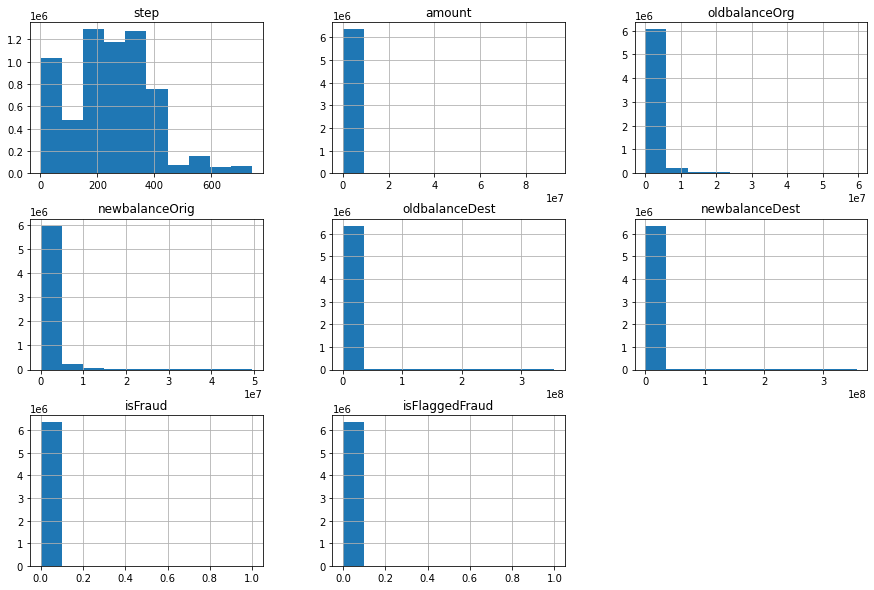

In [25]:
df.hist(figsize=(15,10))

In [36]:
df[df['isFraud'] > 0]
df.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0


In [35]:
df[df['isFlaggedFraud'] > 0]
df.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0


In [34]:
df[df['amount'] == 0]
df.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0


In [29]:
(df[df['amount'] == 0].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 2736447 to 6362585
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16 non-null     int64  
 1   type            16 non-null     object 
 2   amount          16 non-null     float64
 3   nameOrig        16 non-null     object 
 4   oldbalanceOrg   16 non-null     float64
 5   newbalanceOrig  16 non-null     float64
 6   nameDest        16 non-null     object 
 7   oldbalanceDest  16 non-null     float64
 8   newbalanceDest  16 non-null     float64
 9   isFraud         16 non-null     int64  
 10  isFlaggedFraud  16 non-null     int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1.5+ KB


#### 
Number of transactions that are Fraud and are Flagged - 16

In [49]:

df.groupby('type')['isFraud'].mean()

type
CASH_IN     0.000000
CASH_OUT    0.001840
DEBIT       0.000000
PAYMENT     0.000000
TRANSFER    0.007688
Name: isFraud, dtype: float64

In [37]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<AxesSubplot:>

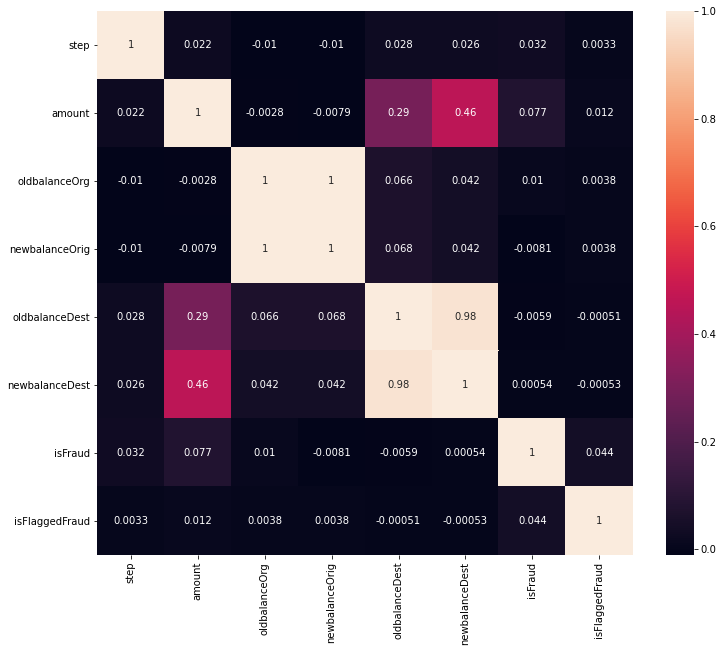

In [38]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)


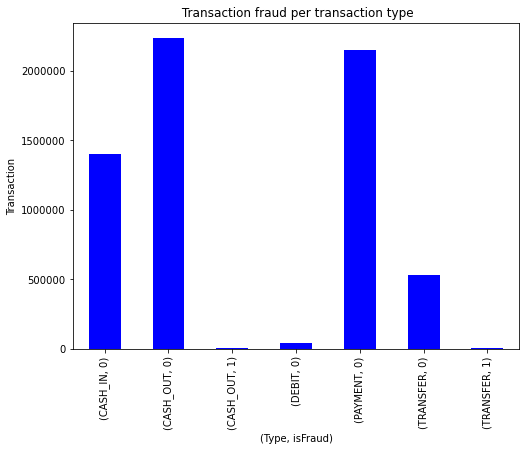

In [48]:
ax = df.groupby(['type', 'isFraud']).size().plot(kind='bar',figsize=(8, 6), color='blue')
ax.set_title(" Transaction fraud per transaction type")
ax.set_xlabel("(Type, isFraud)")
ax.set_ylabel("Transaction")
plt.ticklabel_format(style='plain', axis='y')

<AxesSubplot:xlabel='type', ylabel='isFraud'>

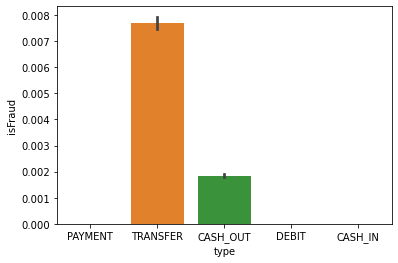

In [43]:
sns.barplot(x='type', y='isFraud', data=df)

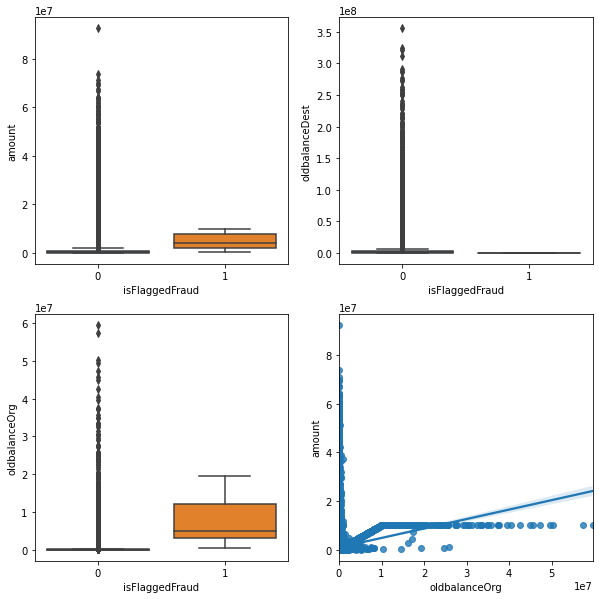

In [58]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
data = df.loc[(df.type == 'TRANSFER'), :]

sns.boxplot(x = 'isFlaggedFraud', y = 'amount', data = data, ax=axs[0][0])


sns.boxplot(x = 'isFlaggedFraud', y = 'oldbalanceDest', data = data, ax=axs[0][1])


sns.boxplot(x = 'isFlaggedFraud', y = 'oldbalanceOrg', data=data, ax=axs[1][0])


sns.regplot(x='oldbalanceOrg', y='amount', data=data)
plt.show()